# Linear Regression :::: 

## Geely Automotive Pricing Model

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Data

CarPrice_Assignment.csv : Contains all the relevent specification about the cars in the US market and their pricing .

In [143]:
# Importing required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Suppress warnings using "warnings" module

import warnings
warnings.filterwarnings('ignore') 

In [144]:
#Setting options for displaying maximum rows and columns as there are high number of columns in the dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [145]:
#Reading Carprice data

cardetails_df= pd.read_csv(r"E:/UPgrad/Geely_auto_MLR_assignment/CarPrice_Assignment.csv")

## Data Routine check

In [146]:
# loading and checking data
cardetails_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [147]:
#Checking the shape of the data for car details
cardetails_df.shape

(205, 26)

In [148]:
cardetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Data Cleaning

In [149]:
# Check for missing values if any
# As per the below check, there is no missing value in the data for any row

cardetails_df.isnull().sum(axis=0)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Checking for outliers

In [150]:
#Describe the dataframe to know the statistics to check for outliers
cardetails_df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

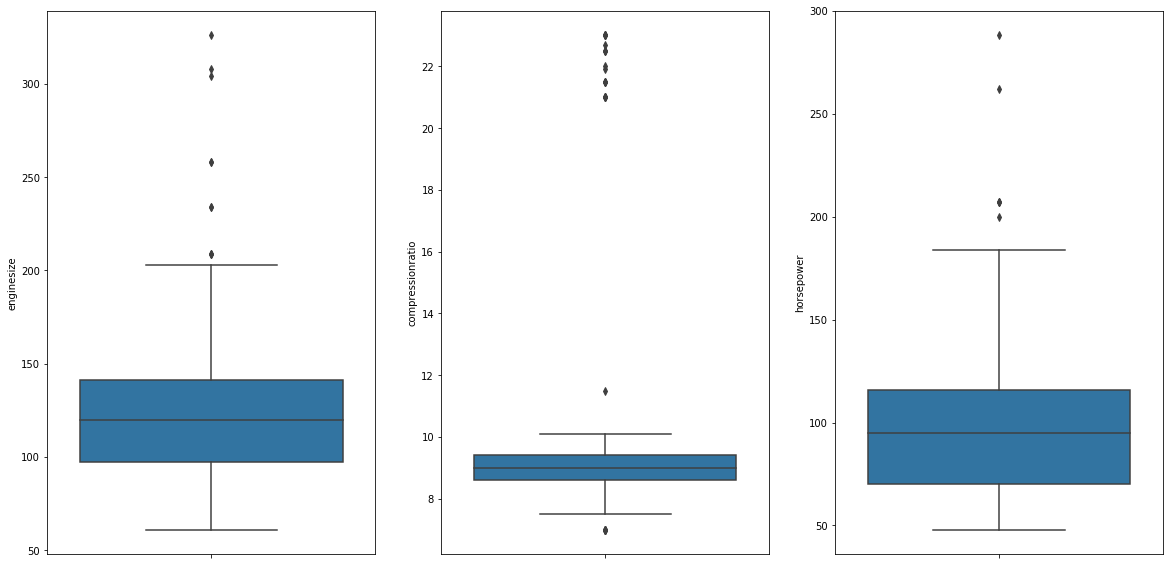

In [151]:
#After observing the above statistical information about the numeric variables of the data. 
#we can plot the variables with outliers to see where they fall but we won't be treating outliers or removing them 
#as the data available is very less and eliminating outliers records will end up with resultant data being very less 
#and affects in terms of difficulty in data analysis
#plotting all the outliers using matplotlib library in combination with seaborn

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))

# subplot 1: enginesize
plt.subplot(1, 3, 1)
sns.boxplot(y=cardetails_df['enginesize'])

# subplot 1: peakrpm
plt.subplot(1, 3, 2)
sns.boxplot(y=cardetails_df['compressionratio'])

# subplot 1: horsepower
plt.subplot(1, 3, 3)
sns.boxplot(y=cardetails_df['horsepower'])


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
    We will not be treating outliers or removing them as the data available is very less and eliminating outliers records will end up with resultant data being very less and affects in terms of difficulty in data analysis.
 
</font></p>

## Data visualization

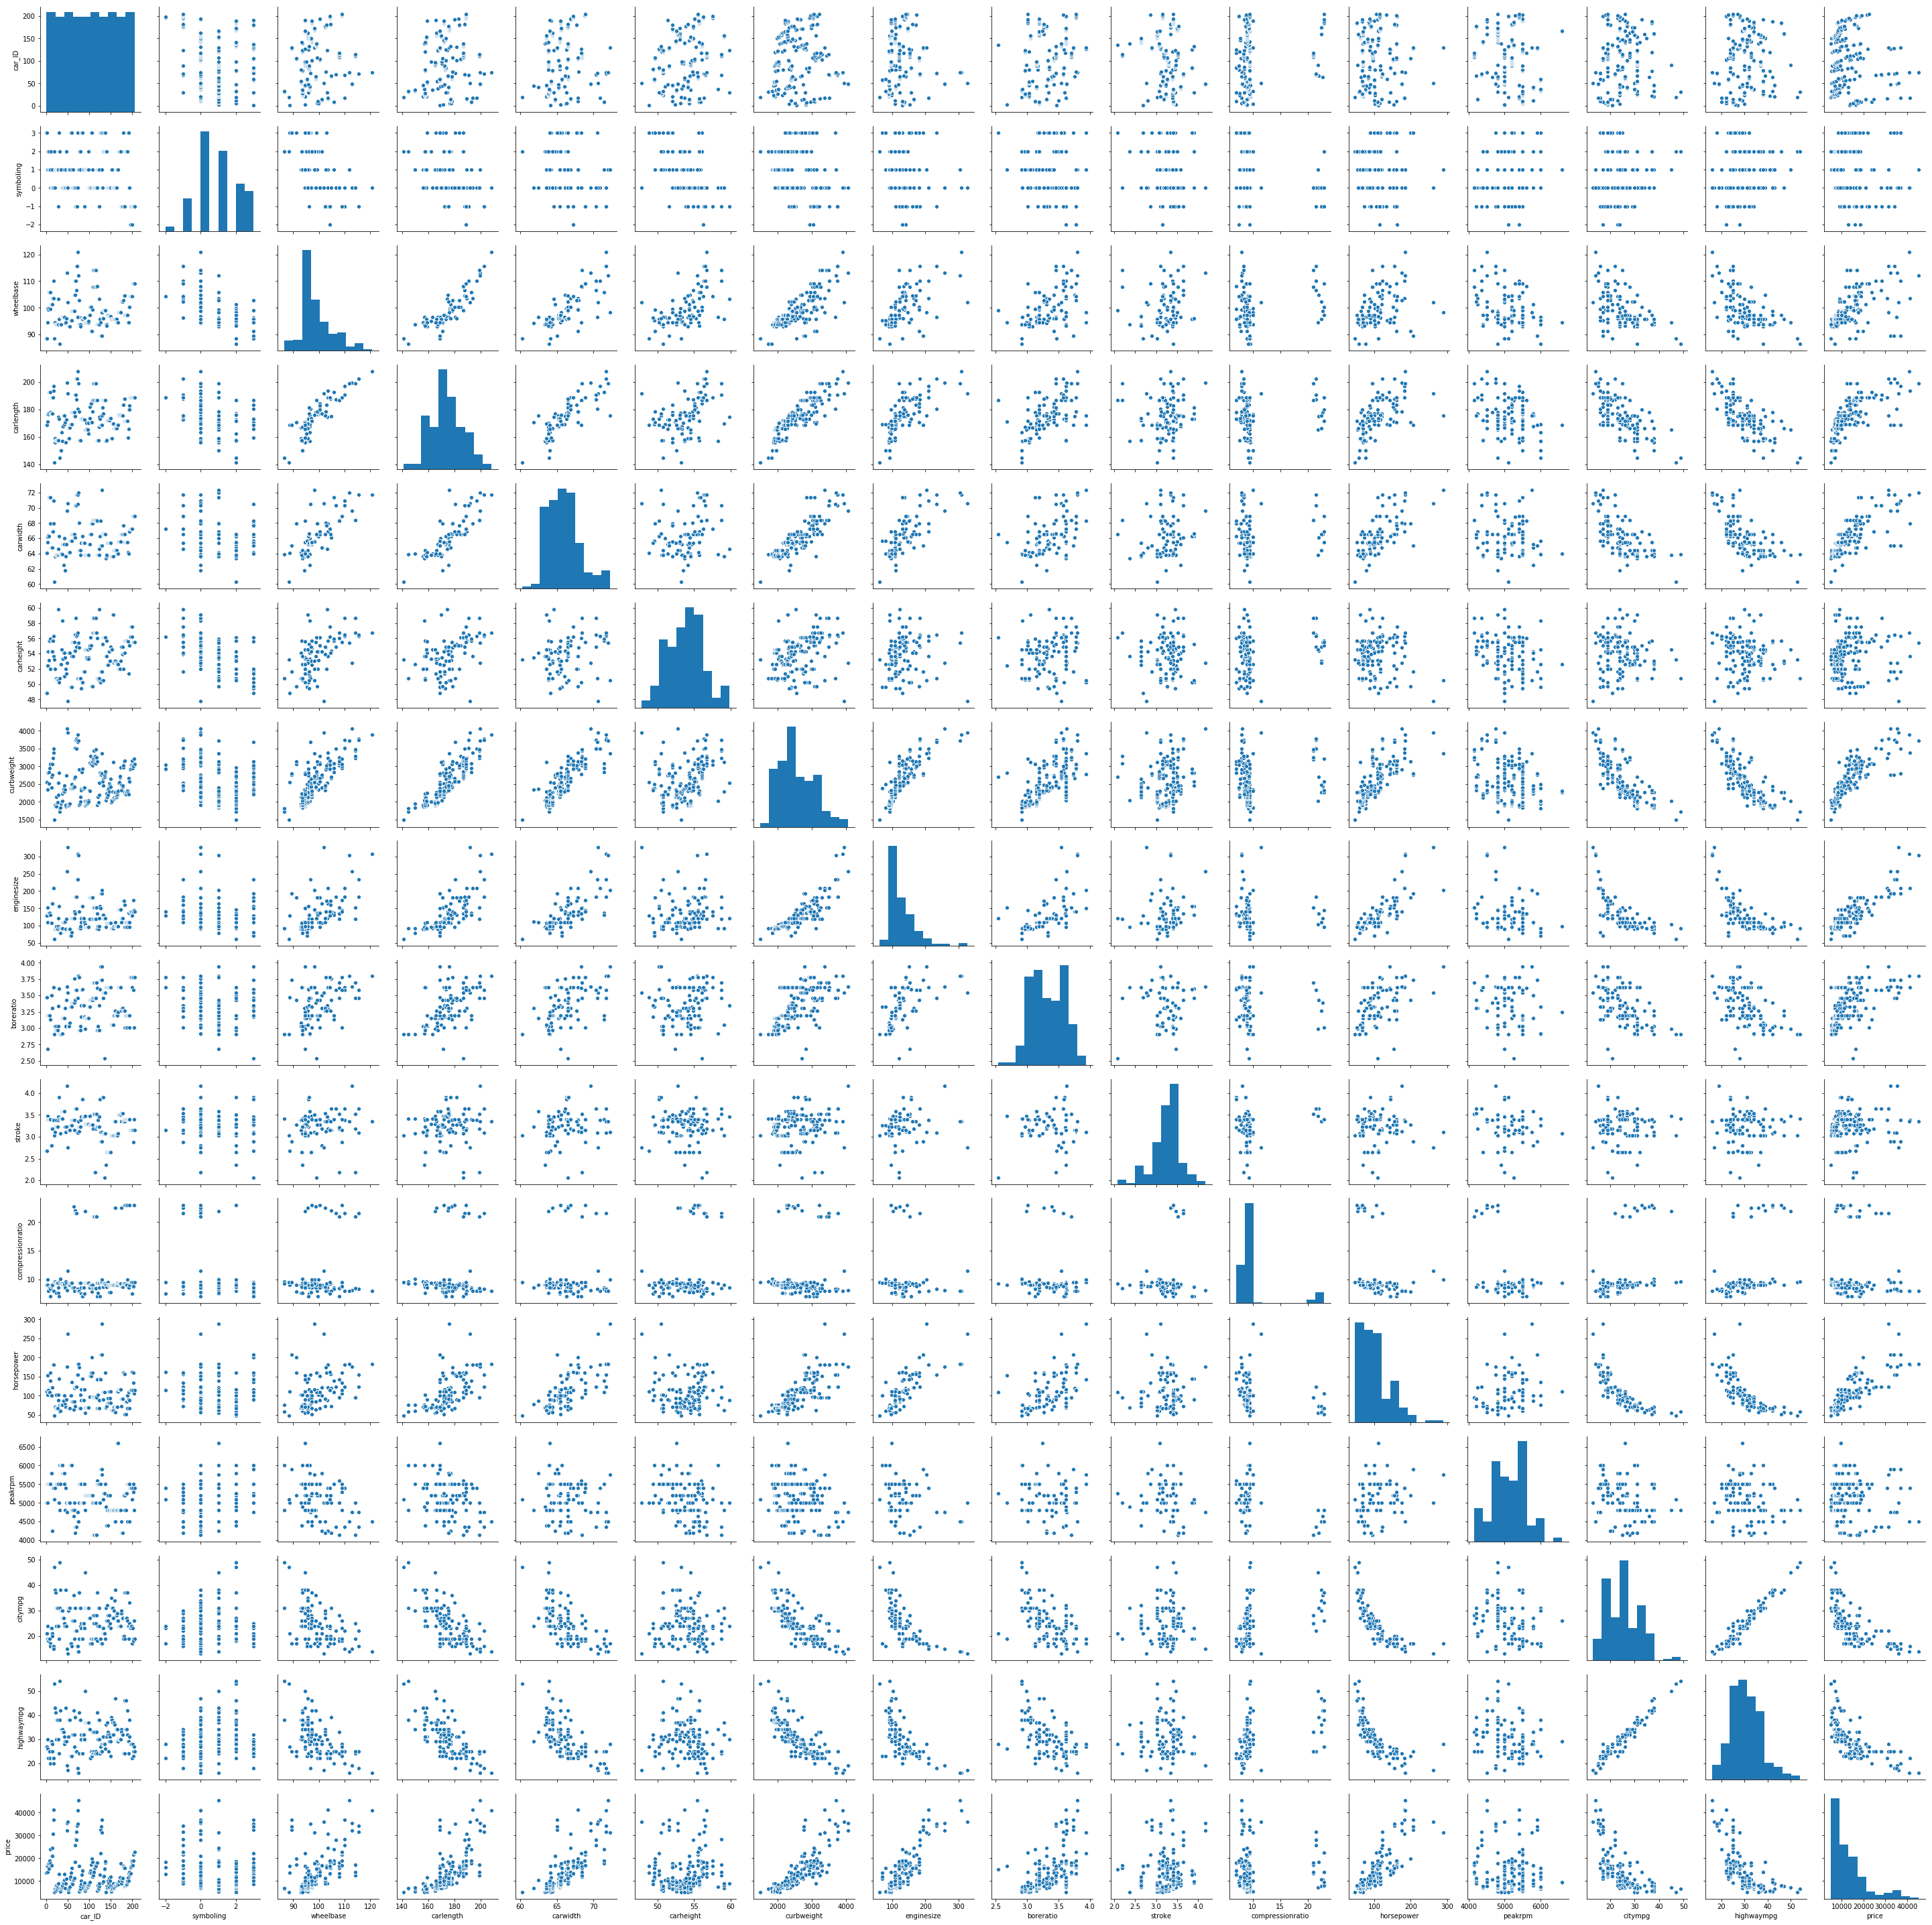

In [152]:
# Visualizing data for understanding the relation ship all the pairwise variables

sns.pairplot(cardetails_df)
plt.show()

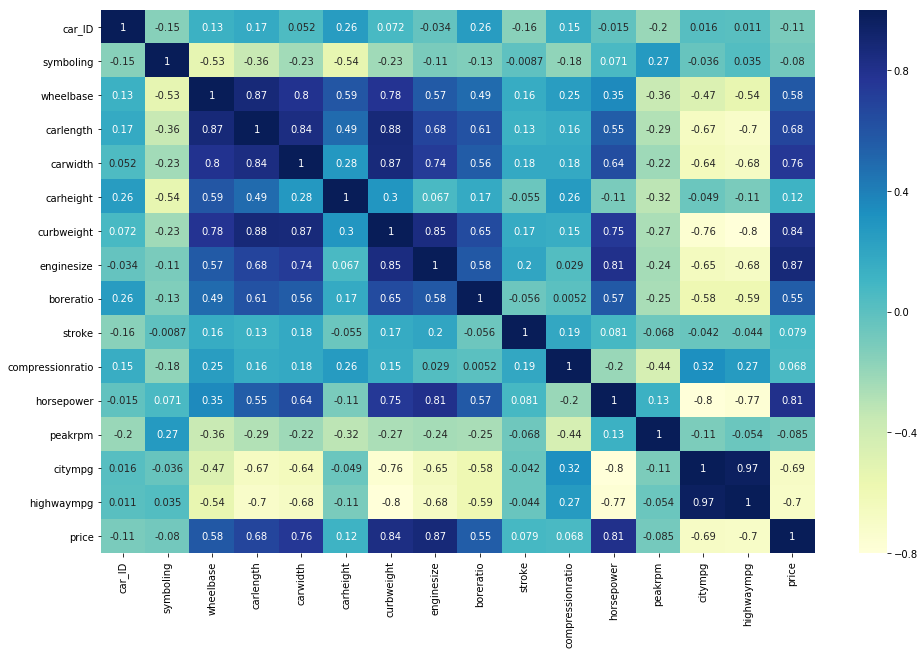

In [153]:
plt.figure(figsize = (16, 10))
cor=cardetails_df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

<p style="font-size:1.5em;color:blue;"><u> Inferences and Conclusions:</u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
From the above correlation plot, we can infer the correlations between all the pairs of variables.<br>
Below variables are positively correlated with price.
    
1. wheelbase,<br>
2. carlength,<br>
3. carwidth,<br>
4. curbweight,<br>
5. enginesize,<br>
6. boreratio,<br>
7. horsepower.<br><br>
    
However, there are also a few variables showing a negative relationship with price variable like,<br>
1. citympg,<br>
2. highwaympg.<br><br>

Also there is a lot of multicollinearity existing among many variables like,<br><br>

1. carlength, wheelbase, carwidth, curbweight<br>
2. curbweight, enginesize, carlength, carwidth, wheelbase<br>
3. enginesize, horsepower, crubweight and dimestions of car<br>


</font></p>

In [154]:
#the below is a correlation among variables in a matrix form
cardetails_df.corr()

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

In [155]:
cardetails_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

## Data Preparation

<p>There is a variable named <b>CarName</b> which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. </p>

In [156]:
cardetails_df["CarName"] = cardetails_df.CarName.map(lambda x: x.split(" ", 1)[0])
cardetails_df["CarName"] = cardetails_df["CarName"].str.lower()

In [157]:
cardetails_df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<p><b>Correcting the carnames that are misspelled</b></p>

In [158]:
cardetails_df['CarName'] = cardetails_df['CarName'].str.replace('alfa-romero','alfa romeo')
cardetails_df['CarName'] = cardetails_df['CarName'].str.replace('maxda','mazda')
cardetails_df['CarName'] = cardetails_df['CarName'].str.replace('porcshce','porsche')
cardetails_df['CarName'] = cardetails_df['CarName'].str.replace('toyouta','toyota')
cardetails_df['CarName'] = cardetails_df['CarName'].str.replace('vokswagen','volkswagen')
cardetails_df['CarName'] = cardetails_df['CarName'].str.replace('vw','volkswagen')

In [159]:
cardetails_df.CarName.unique()

array(['alfa romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [160]:
#Checking the dataframe for final Car Company names
cardetails_df.head()

car_ID  symboling     CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa romeo      gas        std        two  convertible   
1       2          3  alfa romeo      gas        std        two  convertible   
2       3          1  alfa romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [161]:
# Removal of car_ID column as it has only unique values and it doesn't have anthing to do with analysis
cardetails_df.drop('car_ID', axis=1, inplace=True)

In [162]:
cardetails_df.head()

symboling     CarName fueltype aspiration doornumber      carbody  \
0          3  alfa romeo      gas        std        two  convertible   
1          3  alfa romeo      gas        std        two  convertible   
2          1  alfa romeo      gas        std        two    hatchback   
3          2        audi      gas        std       four        sedan   
4          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

## Exploratory Data Analysis

In [163]:
# function for creating charts for univariate analysis for categorical variables

def plot_stats_categorical(cardetails_df,col_list):
    
    plt.figure(figsize=(30, 30))
    for col in col_list:
        plt.subplot(4,3,col_list.index(col)+1)
        if len(cardetails_df[col].value_counts().index) < 10:
            ax = sns.countplot(data = cardetails_df, x= col, order=cardetails_df[col].value_counts().index,hue = None)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                                height + 2,
                        '{:1.2f}%'.format((height*100)/float(len(cardetails_df))),
                        ha="center", weight='bold', fontsize=13)
        else:
            ax = sns.countplot(data = cardetails_df, y= col, order=cardetails_df[col].value_counts().index,hue = None)
            for p in ax.patches:
                percentage = '{:1.2f}%'.format(100 * p.get_width()/float(len(cardetails_df)))
                x = p.get_x() + p.get_width() + 0.02
                y = p.get_y() + p.get_height()
                ax.annotate(percentage, (x, y), weight='bold')
                
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(col, fontsize=18)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

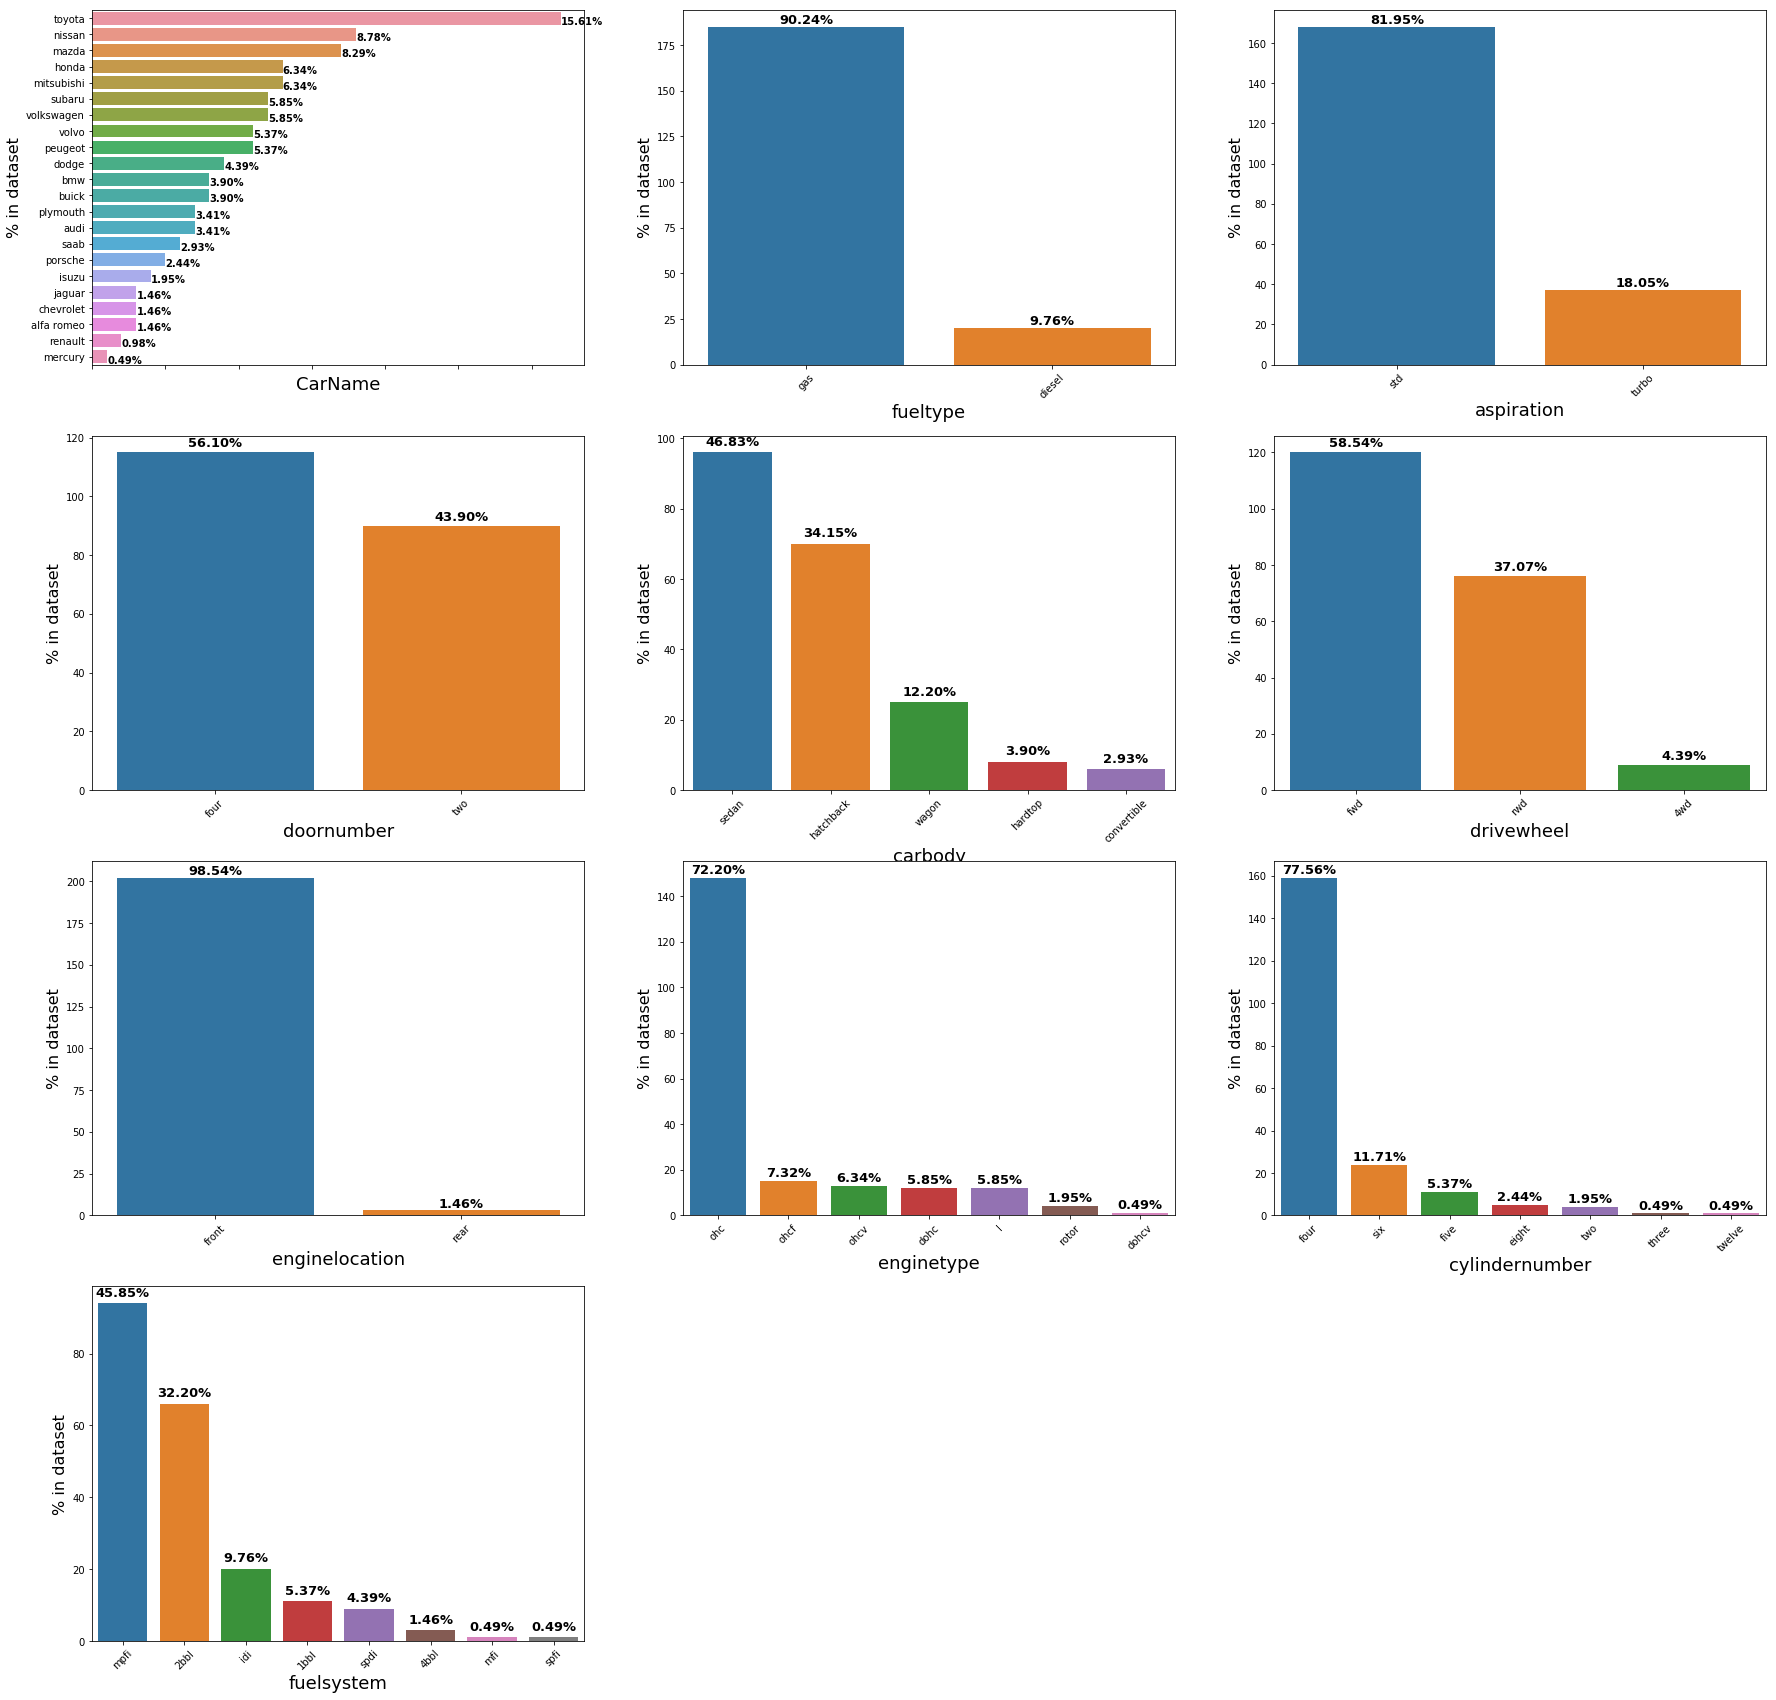

In [164]:
plot_stats_categorical(cardetails_df,list(cardetails_df.select_dtypes(include=['object']).columns))

<p style="font-size:1.5em;color:blue;"><u> Inferences and Conclusions:</u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 

We can see from the above plots those features that are dominant in US market and Geely automotives can consider them before opening their manufacturing line in US market. <br> <br>

1. Car Company: Toyota<br>
2. Carbody: Sedan<br>
3. fueltype: gas<br>
4. aspiration: standard<br>
5. doornumbers: four<br>
6. drivewheel: forward<br>
7. engine location: front<br>
8. engine type: ohc<br>
9. cylinderNumber: four<br>
10. fuelSystem: mpfi<br>

</font></p>

In [165]:
# Function for creating charts for univariate analysis for numerical variables

def plot_stats_numeric(cardetails_df,col_list):
    
    plt.figure(figsize=(30, 30))
    for col in col_list:
        plt.subplot(5,3,col_list.index(col)+1)
        ax= sns.distplot(cardetails_df[col],color='blue', kde=True)
        ax.set_xlabel(col, fontsize=18)

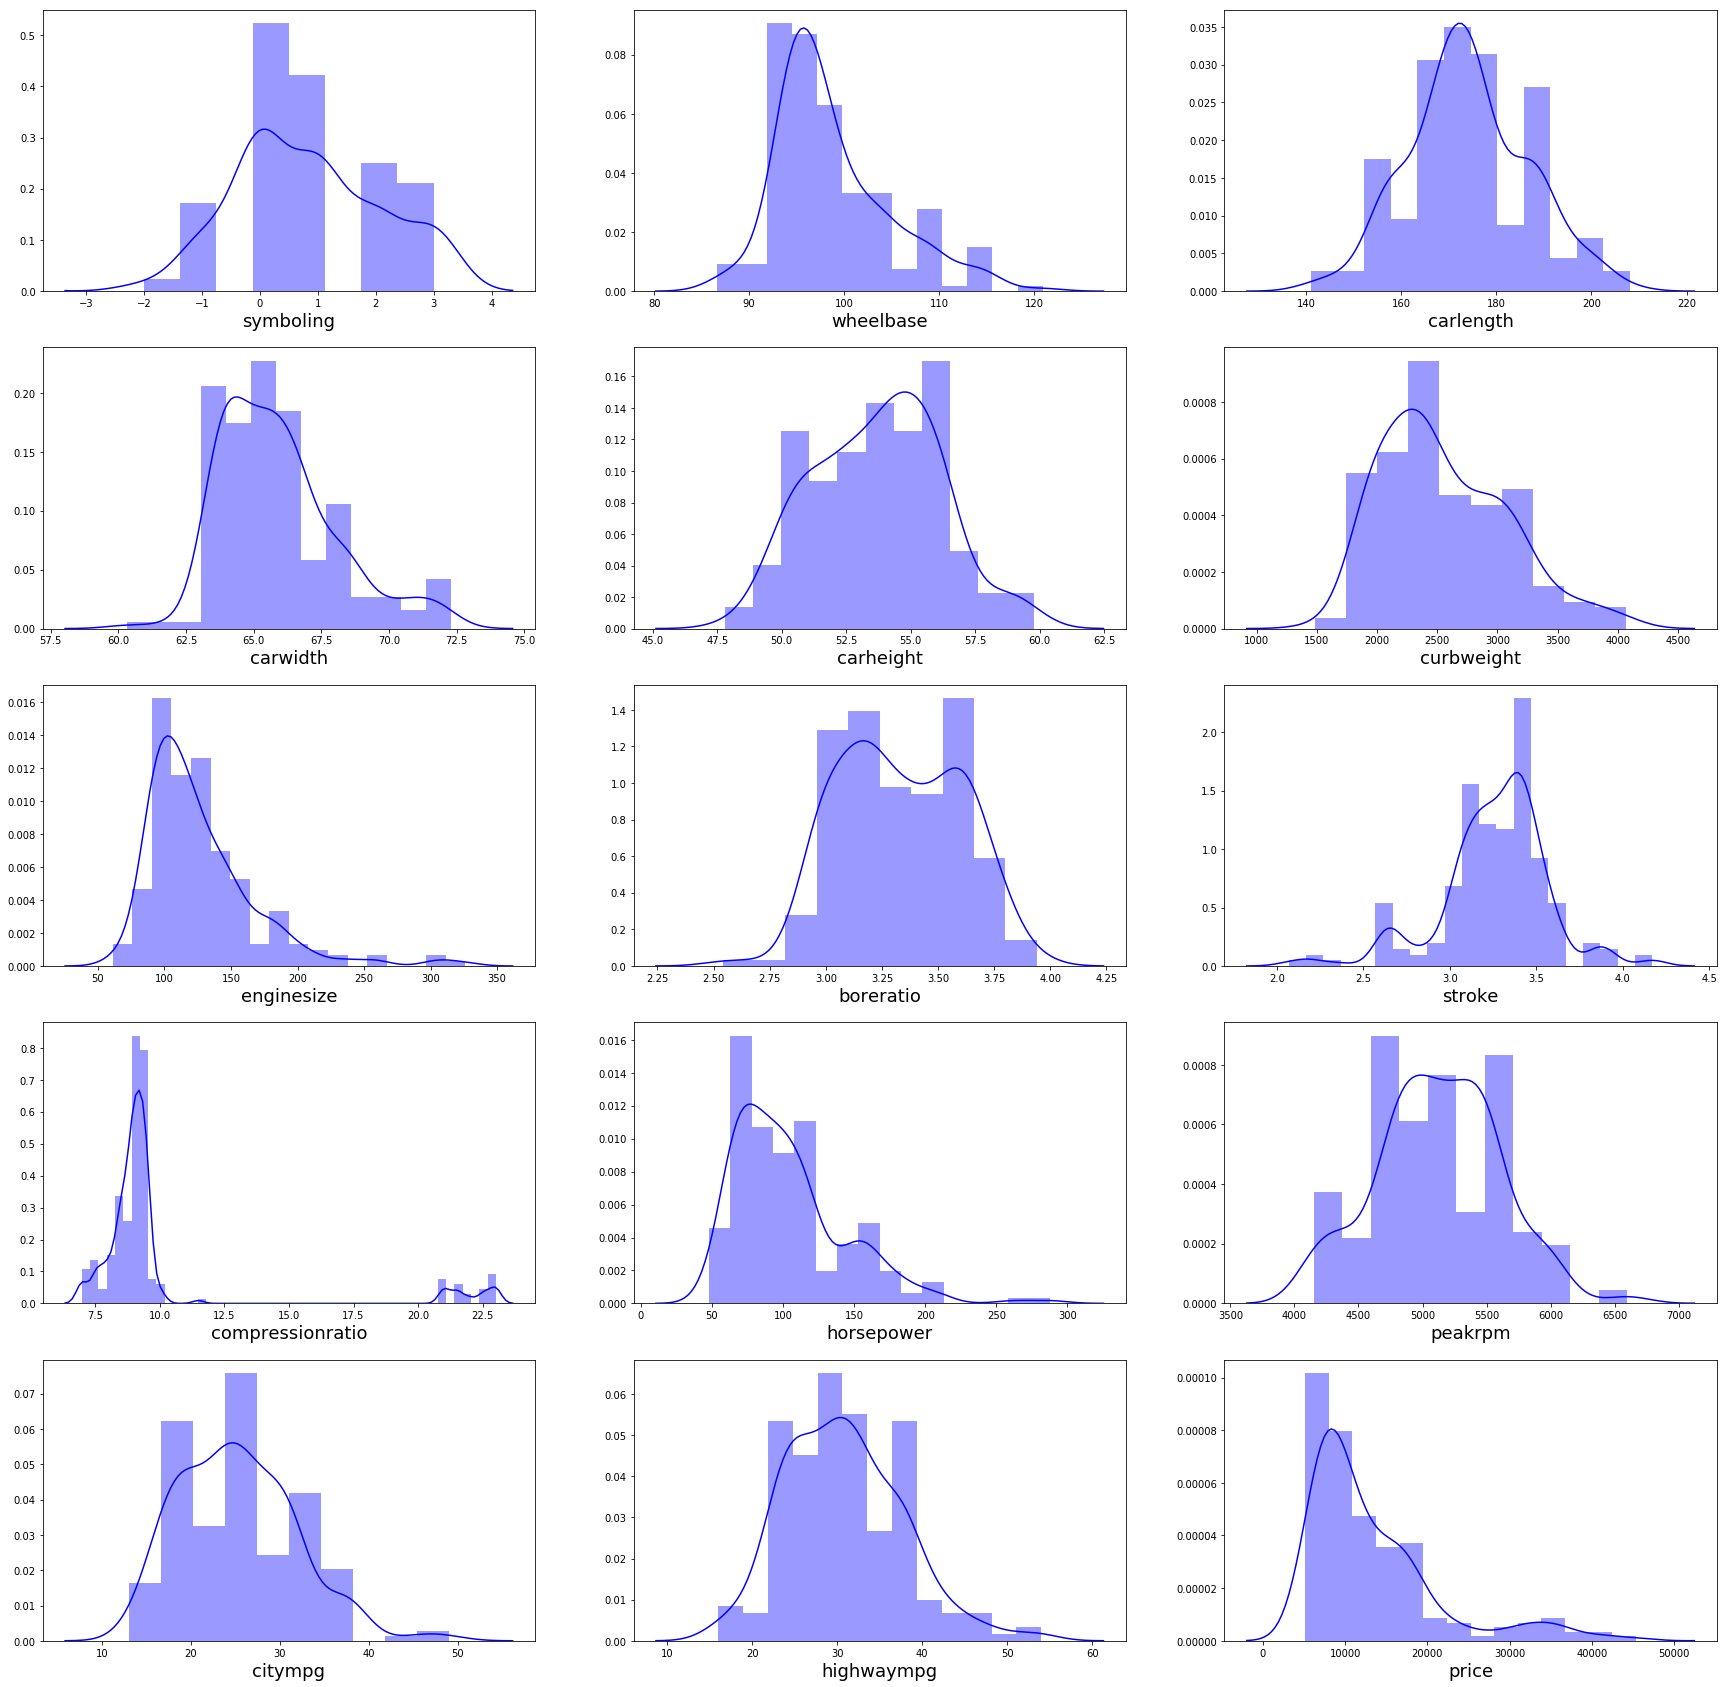

In [166]:
plot_stats_numeric(cardetails_df,list(cardetails_df.select_dtypes(include=['int64','float64']).columns))

<p style="font-size:1.5em;color:blue;"><u> Inferences and Conclusions:</u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
We see enginesize, horsepower and compression ratio variables to have a right skewed distribution, this is probably due to outliers in the variable.
 
</font></p>

## Label Encoding / Creating dummies for categorical variables

<p><b>Categorical variables with 2 level categories are label encoded and dummy variables are created for category levels more than 2 levels. </b></p>

In [167]:
#Now it's time to perform label encoding / create dummies for categorical variables

In [168]:
le = LabelEncoder()

In [169]:
cardetails_df.select_dtypes(include=['object']).aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [170]:
cardetails_df['fueltype'] = le.fit_transform(cardetails_df['fueltype'])

In [171]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'diesel': 0, 'gas': 1}

In [172]:
cardetails_df['aspiration'] = le.fit_transform(cardetails_df['aspiration'])

In [173]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'std': 0, 'turbo': 1}

In [174]:
cardetails_df['doornumber'] = le.fit_transform(cardetails_df['doornumber'])

In [175]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'four': 0, 'two': 1}

In [176]:
cardetails_df['enginelocation'] = le.fit_transform(cardetails_df['enginelocation'])

In [177]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'front': 0, 'rear': 1}

In [178]:
cardetails_df.select_dtypes(include=['object']).columns

Index(['CarName', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [179]:
cardetails_df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [180]:
cardetails_df['symboling'] = pd.Categorical(cardetails_df.symboling)

In [181]:
#Creating dummies for categorical variables with level more than 2.
dummy_df  = pd.get_dummies(cardetails_df[['symboling','CarName', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber',
       'fuelsystem']], drop_first = True)

In [182]:
cardetails_df = pd.concat([cardetails_df, dummy_df], axis = 1)

In [183]:
cardetails_df.head()

symboling     CarName  fueltype  aspiration  doornumber      carbody  \
0         3  alfa romeo         1           0           1  convertible   
1         3  alfa romeo         1           0           1  convertible   
2         1  alfa romeo         1           0           1    hatchback   
3         2        audi         1           0           0        sedan   
4         2        audi         1           0           0        sedan   

  drivewheel  enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd               0       88.6      168.8      64.1       48.8   
1        rwd               0       88.6      168.8      64.1       48.8   
2        rwd               0       94.5      171.2      65.5       52.4   
3        fwd               0       99.8      176.6      66.2       54.3   
4        4wd               0       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  symboling_-1  symboling_0  symboling_1  symboling_2  symboling_3  \
0  13495.0             0            0            0            0            1   
1  16500.0             0            0            0            0            1   
2  16500.0             0            0            1            0            0   
3  13950.0             0            0            0            1            0   
4  17450.0             0            0            0            1            0   

   CarName_audi  CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
0             0            0              0                  0              0   
1             0            0              0                  0              0   
2             0            0              0                  0              0   
3             1            0              0                  0              0   
4             1            0              0                  0              0   

   CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
0                0                   0               0                0   
1                0                   0               0                0   
2                0                   0               0                0   
3                0                   0               0                0   
4                0                   0               0                0   

   CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
0                 0                0                0             0   
1                 0                0                0             0   
2                 0                0                0             0   
3                 0                0                0             0   
4                 0              

In [184]:
#After creating dummies, deleting the original variables.
cardetails_df.drop(['symboling','CarName', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber',
       'fuelsystem'], axis = 1, inplace = True)

In [185]:
cardetails_df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'en

In [186]:
cardetails_df.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
0         1           0           1               0       88.6      168.8   
1         1           0           1               0       88.6      168.8   
2         1           0           1               0       94.5      171.2   
3         1           0           0               0       99.8      176.6   
4         1           0           0               0       99.4      176.6   

   carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
0      64.1       48.8        2548         130       3.47    2.68   
1      64.1       48.8        2548         130       3.47    2.68   
2      65.5       52.4        2823         152       2.68    3.47   
3      66.2       54.3        2337         109       3.19    3.40   
4      66.4       54.3        2824         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   symboling_-1  symboling_0  symboling_1  symboling_2  symboling_3  \
0             0            0            0            0            1   
1             0            0            0            0            1   
2             0            0            1            0            0   
3             0            0            0            1            0   
4             0            0            0            1            0   

   CarName_audi  CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
0             0            0              0                  0              0   
1             0            0              0                  0              0   
2             0            0              0                  0              0   
3             1            0              0                  0              0   
4             1            0              0                  0              0   

   CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
0                0                   0               0                0   
1                0                   0               0                0   
2                0                   0               0                0   
3                0                   0               0                0   
4                0                   0               0                0   

   CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
0                 0                0                0             0   
1                 0                0                0             0   
2                 0                0                0             0   
3                 0                0                0             0   
4                 0                0                0             0   

   CarName_subaru  CarName_toyota  CarName_volkswagen  CarName_volvo  \
0               0               0                   0              0   
1               0               0                   0              0   
2               0               0                   0              0   
3               0               0                   0              0   
4               0               0                   0              0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carb

In [187]:
cardetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
symboling_-1             205 non-null uint8
symboling_0              205 non-null uint8

## Train-Test-Split

In [188]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cardetails_df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Feature Scaling

In [189]:
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.

scaler = MinMaxScaler()

In [190]:
cardetails_df.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
0         1           0           1               0       88.6      168.8   
1         1           0           1               0       88.6      168.8   
2         1           0           1               0       94.5      171.2   
3         1           0           0               0       99.8      176.6   
4         1           0           0               0       99.4      176.6   

   carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
0      64.1       48.8        2548         130       3.47    2.68   
1      64.1       48.8        2548         130       3.47    2.68   
2      65.5       52.4        2823         152       2.68    3.47   
3      66.2       54.3        2337         109       3.19    3.40   
4      66.4       54.3        2824         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   symboling_-1  symboling_0  symboling_1  symboling_2  symboling_3  \
0             0            0            0            0            1   
1             0            0            0            0            1   
2             0            0            1            0            0   
3             0            0            0            1            0   
4             0            0            0            1            0   

   CarName_audi  CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
0             0            0              0                  0              0   
1             0            0              0                  0              0   
2             0            0              0                  0              0   
3             1            0              0                  0              0   
4             1            0              0                  0              0   

   CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
0                0                   0               0                0   
1                0                   0               0                0   
2                0                   0               0                0   
3                0                   0               0                0   
4                0                   0               0                0   

   CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
0                 0                0                0             0   
1                 0                0                0             0   
2                 0                0                0             0   
3                 0                0                0             0   
4                 0                0                0             0   

   CarName_subaru  CarName_toyota  CarName_volkswagen  CarName_volvo  \
0               0               0                   0              0   
1               0               0                   0              0   
2               0               0                   0              0   
3               0               0                   0              0   
4               0               0                   0              0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carb

In [191]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [192]:
df_train.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
122         1           0           0               0   0.244828   0.426016   
125         1           0           1               0   0.272414   0.452033   
166         1           0           1               0   0.272414   0.448780   
1           1           0           1               0   0.068966   0.450407   
199         1           1           0               0   0.610345   0.775610   

     carwidth  carheight  curbweight  enginesize  boreratio    stroke  \
122  0.291667   0.265487    0.272692    0.139623   0.230159  0.525253   
125  0.666667   0.212389    0.500388    0.339623   1.000000  0.464646   
166  0.308333   0.424779    0.314973    0.139623   0.444444  0.449495   
1    0.316667   0.088496    0.411171    0.260377   0.626984  0.247475   
199  0.575000   0.858407    0.647401    0.260377   0.746032  0.484848   

     compressionratio  horsepower   peakrpm   citympg  highwaympg     price  \
122           0.15000    0.083333  0.551020  0.500000    0.567568  0.068818   
125           0.15625    0.395833  0.551020  0.166667    0.270270  0.466890   
166           0.15000    0.266667  1.000000  0.361111    0.324324  0.122110   
1             0.12500    0.262500  0.346939  0.222222    0.270270  0.314446   
199           0.03125    0.475000  0.387755  0.111111    0.135135  0.382131   

     symboling_-1  symboling_0  symboling_1  symboling_2  symboling_3  \
122             0            0            1            0            0   
125             0            0            0            0            1   
166             0            0            1            0            0   
1               0            0            0            0            1   
199             1            0            0            0            0   

     CarName_audi  CarName_bmw  CarName_buick  CarName_chevrolet  \
122             0            0              0                  0   
125             0            0              0                  0   
166             0            0              0                  0   
1               0            0              0                  0   
199             0            0              0                  0   

     CarName_dodge  CarName_honda  CarName_isuzu  CarName_jaguar  \
122              0              0              0               0   
125              0              0              0               0   
166              0              0              0               0   
1                0              0              0               0   
199              0              0              0               0   

     CarName_mazda  CarName_mercury  CarName_mitsubishi  CarName_nissan  \
122              0                0                   0               0   
125              0                0                   0               0   
166              0                0                   0               0   
1                0                0                   0               0   
199              0                0                   0               0   

     CarName_peugeot  CarName_plymouth  CarName_porsche  CarName_renault  \
122                0                 1                0                0   
125                0                 0                1                0   
166                0                 0                0                0   
1                  0                 0                0                0   
199                0                 0                0                0   

     CarName_saab  CarName_subaru  CarName_toyota  CarName_volkswagen  \
122             0               0               0                   0   
125             0               0               0                   0   
166             0               0               1                   0   
1               0               0               0                   0   
199             0               0               0                   0   

     CarName

In [193]:
df_train.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  143.000000  143.000000  143.000000      143.000000  143.000000   
mean     0.909091    0.181818    0.440559        0.006993    0.411141   
std      0.288490    0.387050    0.498199        0.083624    0.205581   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    0.000000    0.000000        0.000000    0.272414   
50%      1.000000    0.000000    0.000000        0.000000    0.341379   
75%      1.000000    0.000000    1.000000        0.000000    0.503448   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

        carlength    carwidth   carheight  curbweight  enginesize   boreratio  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.525476    0.461655    0.509004    0.407878    0.241351    0.497946   
std      0.204848    0.184517    0.215378    0.211269    0.154619    0.207140   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.399187    0.304167    0.353982    0.245539    0.135849    0.305556   
50%      0.502439    0.425000    0.522124    0.355702    0.184906    0.500000   
75%      0.669919    0.550000    0.668142    0.559542    0.301887    0.682540   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           stroke  compressionratio  horsepower     peakrpm     citympg  \
count  143.000000        143.000000  143.000000  143.000000  143.000000   
mean     0.535389          0.190787    0.227302    0.400029    0.344211   
std      0.157843          0.237181    0.165511    0.196438    0.186165   
min      0.000000          0.000000    0.000000    0.000000    0.000000   
25%      0.464646          0.100000    0.091667    0.265306    0.166667   
50%      0.545455          0.125000    0.191667    0.428571    0.333333   
75%      0.611111          0.150000    0.283333    0.551020    0.500000   
max      1.000000          1.000000    1.000000    1.000000    1.000000   

       highwaympg       price  symboling_-1  symboling_0  symboling_1  \
count  143.000000  143.000000    143.000000   143.000000   143.000000   
mean     0.374976    0.219310      0.090909     0.349650     0.300699   
std      0.188477    0.215682      0.288490     0.478536     0.460174   
min      0.000000    0.000000      0.000000     0.000000     0.000000   
25%      0.216216    0.067298      0.000000     0.000000     0.000000   
50%      0.378378    0.140343      0.000000     0.000000     0.000000   
75%      0.527027    0.313479      0.000000     1.000000     1.000000   
max      1.000000    1.000000      1.000000     1.000000     1.000000   

       symboling_2  symboling_3  CarName_audi  CarName_bmw  CarName_buick  \
count   143.000000   143.000000    143.000000   143.000000     143.000000   
mean      0.118881     0.125874      0.034965     0.041958       0.034965   
std       0.324786     0.332873      0.184337     0.201198       0.184337   
min       0.000000     0.000000      0.000000     0.000000       0.000000   
25%       0.000000     0.000000      0.000000     0.000000       0.000000   
50%       0.000000     0.000000      0.000000     0.000000       0.000000   
75%       0.000000     0.000000      0.000000     0.000000       0.000000   
max       1.000000     1.000000      1.000000     1.000000       1.000000   

       CarName_chevrolet  CarName_dodge  CarName_honda  CarName_isuzu  \
count         143.000000     143.000000     143.000000     143.000000   
mean            0.020979       0.041958       0.062937       0.020979   
std             0.143818       0.201198       0.243703       0.143818   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.000000       0.000000       0.000000   
50%             0.000000       0.000000       0.000000       0.000000   
75%             0.000000       0.000000       0.000000       0.000000   
max      

In [194]:
df_train.shape

(143, 69)

## Dividing into X and Y training sets for model building

In [195]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model
We will be using a mix approach. First we will be using Recursive feature elimination (RFE) method for top 25 variables selection (As total features are more than 60 currently) and then using the Statmodel for statistics analysis of the model for final list of important variables explaining the factors to consider for penetration in US market

In [196]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [197]:
rfe.ranking_

array([ 8,  1, 36,  1,  1,  4,  1,  1,  1,  1,  1,  1, 10,  1,  1, 20, 11,
       21, 31, 33, 32, 34, 19,  1, 28,  7,  2,  5, 29, 12, 25, 42,  1, 26,
        1,  1,  1, 37,  1, 35, 27, 24,  3, 15, 14, 16, 17, 41, 23,  1,  1,
       38,  6, 30,  1,  1,  1, 13,  1,  1,  1, 18, 22,  9, 43, 39, 40, 44])

In [198]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 8),
 ('aspiration', True, 1),
 ('doornumber', False, 36),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 20),
 ('highwaympg', False, 11),
 ('symboling_-1', False, 21),
 ('symboling_0', False, 31),
 ('symboling_1', False, 33),
 ('symboling_2', False, 32),
 ('symboling_3', False, 34),
 ('CarName_audi', False, 19),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 28),
 ('CarName_chevrolet', False, 7),
 ('CarName_dodge', False, 2),
 ('CarName_honda', False, 5),
 ('CarName_isuzu', False, 29),
 ('CarName_jaguar', False, 12),
 ('CarName_mazda', False, 25),
 ('CarName_mercury', False, 42),
 ('CarName_mitsubishi', True, 1),
 ('CarName_nissan', False, 26),
 ('CarName_peugeot', True, 1),
 ('C

In [199]:
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'wheelbase', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'CarName_bmw', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_saab',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [200]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'doornumber', 'carlength', 'compressionratio', 'citympg',
       'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury', 'CarName_nissan',
       'CarName_renault', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [201]:
# Creating X_train dataframe with RFE selected top 25 variables
X_train = X_train[col]

In [202]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train)

In [203]:
lm = sm.OLS(y_train,X_train_1).fit()   # Running the linear model

In [204]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.26e-70
Time:                        23:25:28   Log-Likelihood:                 242.95
No. Observations:                 143   AIC:                            -437.9
Df Residuals:                     119   BIC:                            -366.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [205]:
#defining a function to automate vif calculation
def vif_cal(car_df):
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = car_df.columns
    vif['VIF'] = [variance_inflation_factor(car_df.values, i) for i in range(car_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [206]:
vif_cal(X_train)

Features         VIF
24     cylindernumber_two         inf
18           enginetype_l         inf
13        CarName_peugeot         inf
22   cylindernumber_three         inf
19       enginetype_rotor         inf
6              enginesize  115.620000
5              curbweight   93.740000
3                carwidth   60.870000
9              horsepower   43.420000
7               boreratio   42.810000
2               wheelbase   37.990000
21    cylindernumber_four   37.470000
8                  stroke   34.860000
4               carheight   18.700000
10                peakrpm   12.730000
15        CarName_porsche    3.620000
20    cylindernumber_five    3.180000
23  cylindernumber_twelve    3.150000
0              aspiration    2.810000
17       enginetype_dohcv    2.640000
1          enginelocation    2.460000
12     CarName_mitsubishi    1.480000
11            CarName_bmw    1.390000
14       CarName_plymouth    1.220000
16           CarName_saab    1.200000

In [207]:
# dropping "curbweight" due to high vif
X_train.drop('curbweight',axis=1,inplace=True)


In [208]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     113.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.16e-69
Time:                        23:25:29   Log-Likelihood:                 237.38
No. Observations:                 143   AIC:                            -428.8
Df Residuals:                     120   BIC:                            -360.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.28

In [209]:
vif_cal(X_train)

Features        VIF
12        CarName_peugeot        inf
17           enginetype_l        inf
21   cylindernumber_three        inf
18       enginetype_rotor        inf
23     cylindernumber_two        inf
5              enginesize  81.400000
3                carwidth  60.630000
6               boreratio  42.450000
8              horsepower  39.330000
20    cylindernumber_four  36.840000
2               wheelbase  35.290000
7                  stroke  32.720000
4               carheight  16.250000
9                 peakrpm  12.440000
14        CarName_porsche   3.610000
19    cylindernumber_five   3.050000
22  cylindernumber_twelve   2.750000
0              aspiration   2.650000
16       enginetype_dohcv   2.560000
1          enginelocation   2.340000
11     CarName_mitsubishi   1.470000
10            CarName_bmw   1.340000
15           CarName_saab   1.200000
13       CarName_plymouth   1.200000

In [210]:
# dropping "carheight" with high p-value and vif
X_train.drop('carheight',axis=1,inplace=True)


In [211]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_3 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.21e-70
Time:                        23:25:30   Log-Likelihood:                 237.20
No. Observations:                 143   AIC:                            -430.4
Df Residuals:                     121   BIC:                            -365.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

In [212]:
vif_cal(X_train)

Features        VIF
11        CarName_peugeot        inf
16           enginetype_l        inf
20   cylindernumber_three        inf
17       enginetype_rotor        inf
22     cylindernumber_two        inf
4              enginesize  81.400000
3                carwidth  60.610000
5               boreratio  42.340000
7              horsepower  39.280000
19    cylindernumber_four  34.150000
6                  stroke  32.700000
2               wheelbase  27.290000
8                 peakrpm  12.440000
13        CarName_porsche   3.570000
18    cylindernumber_five   2.970000
21  cylindernumber_twelve   2.720000
0              aspiration   2.650000
15       enginetype_dohcv   2.540000
1          enginelocation   2.220000
10     CarName_mitsubishi   1.310000
9             CarName_bmw   1.290000
14           CarName_saab   1.160000
12       CarName_plymouth   1.140000

In [213]:
#dropping horsepower with high vif and p-value
X_train.drop('horsepower',axis=1,inplace=True)

In [214]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_4 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     126.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.23e-71
Time:                        23:25:31   Log-Likelihood:                 237.03
No. Observations:                 143   AIC:                            -432.1
Df Residuals:                     122   BIC:                            -369.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

In [215]:
vif_cal(X_train)

Features        VIF
21     cylindernumber_two        inf
19   cylindernumber_three        inf
15           enginetype_l        inf
10        CarName_peugeot        inf
16       enginetype_rotor        inf
4              enginesize  65.930000
3                carwidth  60.130000
5               boreratio  39.690000
6                  stroke  32.680000
18    cylindernumber_four  29.480000
2               wheelbase  26.150000
7                 peakrpm   6.510000
12        CarName_porsche   3.560000
17    cylindernumber_five   2.770000
20  cylindernumber_twelve   2.680000
1          enginelocation   2.220000
14       enginetype_dohcv   2.140000
0              aspiration   1.830000
9      CarName_mitsubishi   1.310000
8             CarName_bmw   1.280000
11       CarName_plymouth   1.130000
13           CarName_saab   1.100000

In [216]:
# dropping "enginetype_rotor" as it has infinite vif which is the highest degree of correlation
X_train.drop('enginetype_rotor',axis=1,inplace=True)
#enginetype_rotor

In [217]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_5 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     126.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.23e-71
Time:                        23:25:33   Log-Likelihood:                 237.03
No. Observations:                 143   AIC:                            -432.1
Df Residuals:                     122   BIC:                            -369.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

In [218]:
vif_cal(X_train)

Features        VIF
10        CarName_peugeot        inf
15           enginetype_l        inf
18   cylindernumber_three        inf
4              enginesize  65.930000
3                carwidth  60.130000
5               boreratio  39.690000
6                  stroke  32.680000
17    cylindernumber_four  29.480000
2               wheelbase  26.150000
7                 peakrpm   6.510000
20     cylindernumber_two   4.640000
12        CarName_porsche   3.560000
16    cylindernumber_five   2.770000
19  cylindernumber_twelve   2.680000
1          enginelocation   2.220000
14       enginetype_dohcv   2.140000
0              aspiration   1.830000
9      CarName_mitsubishi   1.310000
8             CarName_bmw   1.280000
11       CarName_plymouth   1.130000
13           CarName_saab   1.100000

In [219]:
#dropping enginetype_l due to highest degree of correlation
X_train.drop('enginetype_l',axis=1,inplace=True)
#enginetype_l

In [220]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_6 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     126.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.23e-71
Time:                        23:25:34   Log-Likelihood:                 237.03
No. Observations:                 143   AIC:                            -432.1
Df Residuals:                     122   BIC:                            -369.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

In [221]:
vif_cal(X_train)

Features    VIF
4              enginesize  65.93
3                carwidth  60.13
5               boreratio  39.69
6                  stroke  32.68
16    cylindernumber_four  29.48
2               wheelbase  26.15
7                 peakrpm   6.51
19     cylindernumber_two   4.64
12        CarName_porsche   3.56
15    cylindernumber_five   2.77
18  cylindernumber_twelve   2.68
1          enginelocation   2.22
14       enginetype_dohcv   2.14
10        CarName_peugeot   1.85
0              aspiration   1.83
9      CarName_mitsubishi   1.31
17   cylindernumber_three   1.29
8             CarName_bmw   1.28
11       CarName_plymouth   1.13
13           CarName_saab   1.10

In [222]:
#dropping "enginetype_dohcv" with high p-value
X_train.drop('enginetype_dohcv',axis=1,inplace=True)
#enginetype_dohcv

In [223]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_7 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_7).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.38e-72
Time:                        23:25:35   Log-Likelihood:                 236.70
No. Observations:                 143   AIC:                            -433.4
Df Residuals:                     123   BIC:                            -374.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

In [224]:
vif_cal(X_train)

Features    VIF
4              enginesize  65.03
3                carwidth  58.28
5               boreratio  39.53
6                  stroke  32.56
15    cylindernumber_four  28.79
2               wheelbase  25.89
7                 peakrpm   6.48
18     cylindernumber_two   4.56
14    cylindernumber_five   2.70
17  cylindernumber_twelve   2.67
12        CarName_porsche   2.38
10        CarName_peugeot   1.85
0              aspiration   1.83
1          enginelocation   1.78
9      CarName_mitsubishi   1.31
16   cylindernumber_three   1.29
8             CarName_bmw   1.28
11       CarName_plymouth   1.13
13           CarName_saab   1.10

In [225]:
#dropping "carname_plymouth" due to high p-value
X_train.drop('CarName_plymouth',axis=1,inplace=True)
#CarName_plymouth

In [226]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_8 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_8).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     140.1
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.57e-73
Time:                        23:25:36   Log-Likelihood:                 235.75
No. Observations:                 143   AIC:                            -433.5
Df Residuals:                     124   BIC:                            -377.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

In [227]:
vif_cal(X_train)

Features    VIF
4              enginesize  63.98
3                carwidth  58.05
5               boreratio  38.43
6                  stroke  32.40
14    cylindernumber_four  28.16
2               wheelbase  25.89
7                 peakrpm   6.39
17     cylindernumber_two   4.52
13    cylindernumber_five   2.69
16  cylindernumber_twelve   2.66
11        CarName_porsche   2.37
10        CarName_peugeot   1.85
0              aspiration   1.79
1          enginelocation   1.78
15   cylindernumber_three   1.29
9      CarName_mitsubishi   1.29
8             CarName_bmw   1.28
12           CarName_saab   1.10

In [228]:
#dropping "stroke" value due to high vif
X_train.drop('stroke',axis=1,inplace=True)
#stroke

In [229]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_9 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_9).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     98.46
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           8.38e-64
Time:                        23:25:38   Log-Likelihood:                 207.61
No. Observations:                 143   AIC:                            -379.2
Df Residuals:                     125   BIC:                            -325.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

In [230]:
vif_cal(X_train)

Features    VIF
3                carwidth  57.87
4              enginesize  28.94
2               wheelbase  25.50
5               boreratio  20.29
13    cylindernumber_four   9.94
6                 peakrpm   6.38
16     cylindernumber_two   2.51
10        CarName_porsche   2.34
12    cylindernumber_five   2.13
9         CarName_peugeot   1.82
1          enginelocation   1.77
0              aspiration   1.74
15  cylindernumber_twelve   1.58
7             CarName_bmw   1.28
8      CarName_mitsubishi   1.28
11           CarName_saab   1.10
14   cylindernumber_three   1.07

In [231]:
#dropping "wheelbase " with high vif value and p-value
X_train.drop('wheelbase',axis=1,inplace=True)
#wheelbase

In [232]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_10 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_10).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.73e-64
Time:                        23:25:39   Log-Likelihood:                 206.21
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     126   BIC:                            -328.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

In [233]:
vif_cal(X_train)

Features    VIF
2                carwidth  37.20
3              enginesize  28.83
4               boreratio  20.27
12    cylindernumber_four   9.90
5                 peakrpm   6.30
15     cylindernumber_two   2.50
11    cylindernumber_five   2.13
9         CarName_porsche   1.94
1          enginelocation   1.75
0              aspiration   1.73
8         CarName_peugeot   1.51
14  cylindernumber_twelve   1.51
7      CarName_mitsubishi   1.26
6             CarName_bmw   1.23
10           CarName_saab   1.10
13   cylindernumber_three   1.07

In [234]:
#dropping "peakrpm" with high p-value
X_train.drop('peakrpm',axis=1,inplace=True)
#peakrpm

In [235]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_11 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_11).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     108.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.12e-64
Time:                        23:25:40   Log-Likelihood:                 204.53
No. Observations:                 143   AIC:                            -377.1
Df Residuals:                     127   BIC:                            -329.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

In [236]:
vif_cal(X_train)

Features    VIF
2                carwidth  35.36
3              enginesize  28.24
4               boreratio  17.98
11    cylindernumber_four   6.72
10    cylindernumber_five   2.08
14     cylindernumber_two   1.97
8         CarName_porsche   1.88
0              aspiration   1.72
1          enginelocation   1.71
13  cylindernumber_twelve   1.50
7         CarName_peugeot   1.42
6      CarName_mitsubishi   1.25
5             CarName_bmw   1.22
9            CarName_saab   1.09
12   cylindernumber_three   1.01

In [237]:
#dropping "boreratio" with high vif
X_train.drop('boreratio',axis=1,inplace=True)
#boreratio

In [238]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_12 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_12).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     106.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.68e-63
Time:                        23:25:42   Log-Likelihood:                 198.25
No. Observations:                 143   AIC:                            -366.5
Df Residuals:                     128   BIC:                            -322.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

In [239]:
vif_cal(X_train)

Features    VIF
2                carwidth  35.33
3              enginesize  21.79
10    cylindernumber_four   4.20
9     cylindernumber_five   2.07
7         CarName_porsche   1.72
1          enginelocation   1.71
0              aspiration   1.70
13     cylindernumber_two   1.62
12  cylindernumber_twelve   1.40
6         CarName_peugeot   1.38
5      CarName_mitsubishi   1.24
4             CarName_bmw   1.20
8            CarName_saab   1.06
11   cylindernumber_three   1.00

In [240]:
#dropping "cylindernumber_four" with high p-value
X_train.drop('cylindernumber_four',axis=1,inplace=True)

In [241]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_13 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_13).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.35e-64
Time:                        23:25:43   Log-Likelihood:                 197.89
No. Observations:                 143   AIC:                            -367.8
Df Residuals:                     129   BIC:                            -326.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [242]:
vif_cal(X_train)

Features    VIF
2                carwidth  15.75
3              enginesize  14.75
0              aspiration   1.69
1          enginelocation   1.63
7         CarName_porsche   1.62
11  cylindernumber_twelve   1.38
9     cylindernumber_five   1.37
6         CarName_peugeot   1.34
12     cylindernumber_two   1.26
4             CarName_bmw   1.19
5      CarName_mitsubishi   1.19
8            CarName_saab   1.06
10   cylindernumber_three   1.00

In [243]:
#droping cylindernumber_twelve due to high p-value
X_train.drop('cylindernumber_twelve',axis=1,inplace=True)
#cylindernumber_twelve

In [244]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_14 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_14).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     123.1
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           8.07e-65
Time:                        23:25:45   Log-Likelihood:                 196.77
No. Observations:                 143   AIC:                            -367.5
Df Residuals:                     130   BIC:                            -329.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1715 

In [245]:
vif_cal(X_train)

Features    VIF
2               carwidth  13.17
3             enginesize  11.10
0             aspiration   1.69
7        CarName_porsche   1.62
1         enginelocation   1.61
9    cylindernumber_five   1.37
6        CarName_peugeot   1.34
11    cylindernumber_two   1.22
5     CarName_mitsubishi   1.19
4            CarName_bmw   1.15
8           CarName_saab   1.06
10  cylindernumber_three   1.00

In [246]:
#dropping "cylindernumber_five" due to high p-value
X_train.drop('cylindernumber_five',axis=1,inplace=True)
#cylindernumber_five

In [247]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_15 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_15).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.74e-65
Time:                        23:25:46   Log-Likelihood:                 195.73
No. Observations:                 143   AIC:                            -367.5
Df Residuals:                     131   BIC:                            -331.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1813 

In [248]:
vif_cal(X_train)

Features    VIF
2               carwidth  11.90
3             enginesize  10.66
0             aspiration   1.61
1         enginelocation   1.60
7        CarName_porsche   1.60
6        CarName_peugeot   1.25
10    cylindernumber_two   1.20
4            CarName_bmw   1.15
5     CarName_mitsubishi   1.15
8           CarName_saab   1.04
9   cylindernumber_three   1.00

In [249]:
#dropping "carname_saab" due to high p-value
X_train.drop('CarName_saab',axis=1,inplace=True)
#CarName_saab

In [250]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_16 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_16).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.76e-66
Time:                        23:25:47   Log-Likelihood:                 194.65
No. Observations:                 143   AIC:                            -367.3
Df Residuals:                     132   BIC:                            -334.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1815 

In [251]:
vif_cal(X_train)

Features    VIF
2              carwidth  11.70
3            enginesize  10.58
0            aspiration   1.61
1        enginelocation   1.60
7       CarName_porsche   1.60
6       CarName_peugeot   1.24
9    cylindernumber_two   1.20
4           CarName_bmw   1.15
5    CarName_mitsubishi   1.15
8  cylindernumber_three   1.00

In [252]:
#dropping carwidth due to high vif value
X_train.drop('carwidth',axis=1,inplace=True)
#carwidth

In [253]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_17 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_17).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     109.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.25e-57
Time:                        23:25:49   Log-Likelihood:                 169.09
No. Observations:                 143   AIC:                            -318.2
Df Residuals:                     133   BIC:                            -288.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0867 

In [254]:
vif_cal(X_train)

Features   VIF
6       CarName_porsche  1.57
1        enginelocation  1.50
2            enginesize  1.49
0            aspiration  1.48
5       CarName_peugeot  1.18
4    CarName_mitsubishi  1.15
3           CarName_bmw  1.13
7  cylindernumber_three  1.00
8    cylindernumber_two  1.00

In [255]:
#dropping "CarName_peugeot" due to high p-value
X_train.drop('CarName_peugeot',axis=1,inplace=True)
#carname_peugeot

In [256]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_18 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_18).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.80e-58
Time:                        23:25:50   Log-Likelihood:                 168.83
No. Observations:                 143   AIC:                            -319.7
Df Residuals:                     134   BIC:                            -293.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0870 

In [257]:
vif_cal(X_train)

Features   VIF
5       CarName_porsche  1.57
1        enginelocation  1.50
2            enginesize  1.46
0            aspiration  1.35
3           CarName_bmw  1.13
4    CarName_mitsubishi  1.12
6  cylindernumber_three  1.00
7    cylindernumber_two  1.00

In [258]:
#dropping "enginelocation" due to high p-value
X_train.drop('enginelocation',axis=1,inplace=True)
#enginelocation

In [259]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_19 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_19).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     139.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.21e-58
Time:                        23:25:51   Log-Likelihood:                 167.82
No. Observations:                 143   AIC:                            -319.6
Df Residuals:                     135   BIC:                            -295.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0875 

In [260]:
vif_cal(X_train)

Features   VIF
1            enginesize  1.46
0            aspiration  1.35
2           CarName_bmw  1.13
3    CarName_mitsubishi  1.12
4       CarName_porsche  1.08
5  cylindernumber_three  1.00
6    cylindernumber_two  1.00

In [261]:
#dropping "cylindernumber_three" due to high p-value
X_train.drop('cylindernumber_three',axis=1,inplace=True)


In [262]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_20 = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_20).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     162.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.72e-59
Time:                        23:25:53   Log-Likelihood:                 167.14
No. Observations:                 143   AIC:                            -320.3
Df Residuals:                     136   BIC:                            -299.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0850      0

In [263]:
vif_cal(X_train)

Features   VIF
1          enginesize  1.46
0          aspiration  1.35
2         CarName_bmw  1.13
3  CarName_mitsubishi  1.12
4     CarName_porsche  1.08
5  cylindernumber_two  1.00

## Residual Analysis of the train data

In [264]:
#Residual analysis of the train data

y_train_price = lm.predict(X_train_20)

Text(0.5,0,'Errors')

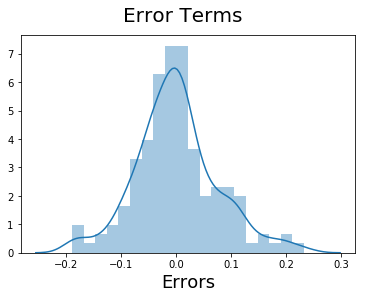

In [265]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

<p style="font-size:1.5em;color:blue;"><u> Inferences and Conclusions:</u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
    
The above plot is very close to normal distribution and its mean is almost centered around zero. there is little unexplained error terms variance towards the tail on right side. but it may be due to size of train and test data. considering the size of the train and test data this error term distribution still is close to a normal distribution.
 
</font></p>

## Making Predictions

### Testing the regression model on test set

Applying scalar to test dataset. Applying the transformation on the test set using the scalar used during training set therefore we only use those variables which we used to train the final model. So lets use only those.

In [266]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

### divide data between X and y test datasets with y being a target variable

In [267]:
y_test = df_test.pop('price')
X_test = df_test

In [268]:
X_train.columns

Index(['aspiration', 'enginesize', 'CarName_bmw', 'CarName_mitsubishi',
       'CarName_porsche', 'cylindernumber_two'],
      dtype='object')

In [269]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [270]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

In [271]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

Text(0,0.5,'y_pred')

<p style="font-size:1.5em;color:blue;"><u> Inferences and Conclusions:</u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
    It is quiet a linear relation ship between y_test and y_pred. hence we can conclude that its quiet a good model

</font></p>

In [272]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.09497045217029894
Model r2_score: 0.7939179405686314


<p style="font-size:1.5em;color:blue;"><u> Inferences and Conclusions:</u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
    r2_score on the test data is pretty good anf close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score and a low RMSE of 0.095. <br><br>
    
Training model number 20 with r-squared value of 87 percentage and adjusted r-squared value of 87 percentage is a pretty good linear regression model.

</font></p>

In [273]:
y_test.values

array([0.05847354, 0.07739807, 0.08614785, 0.09747256, 0.05509862,
       0.14614635, 0.32551686, 0.27759306, 0.30674233, 0.29499263,
       0.28614285, 0.31876703, 0.25451864, 0.18864528, 0.88900277,
       0.03639909, 0.03847404, 0.16927077, 0.32201695, 0.23674408,
       0.20039499, 0.27789305, 0.67820804, 0.00432489, 0.07624809,
       0.20249494, 0.1841204 , 0.56941076, 0.2881428 , 0.14122147,
       0.01974951, 0.63400915, 0.21151971, 0.34114147, 0.28076798,
       0.13247169, 0.24101897, 0.11474713, 0.03624909, 0.08872278,
       1.        , 0.21376966, 0.04497388, 0.07749806, 0.        ,
       0.08874778, 0.05524862, 0.09699758, 0.06489838, 0.10239744,
       0.03489913, 0.10599735, 0.07097323, 0.11489713, 0.33801655,
       0.06247344, 0.0880478 , 0.0880478 , 0.18912027, 0.05939852,
       0.12239694, 0.79070523])

In [274]:
y_pred.shape

(62,)

Text(0.5,0.98,'Actual and Predicted')

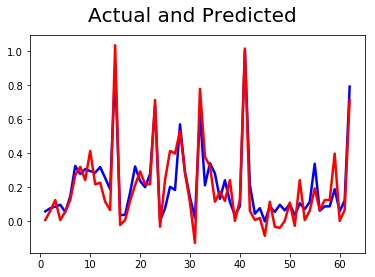

In [275]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
#plt.xlabel('y_test', fontsize=18)                               # X-label
#plt.ylabel('y_pred', fontsize=16)   

## Final Inference


<p style="font-size:1.5em;color:blue;"><u> Inferences and Conclusions:</u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
With a low p-value and low VIF, these variables do describe the price of the automobiles to a very good extent.<br>

Final predictors of a linear regression model are:<br>

Predictors are <br><br>

1. enginesize with coef value - > 1.1185<br>
2. aspiration with coef value - > 0.1067<br>
3. CarName_bmw with coef value - > 0.2275<br>
4. CarName_mitsubishi with coef value - >   -0.1048<br>
5. CarName_porsche with coef value  - > 0.2354<br>
6. cylindernumber_two with coef value - >  0.2548 <br><br>


This implies how the price of the vehicle changes with a unit change in any of these independent variable with all other variables held constant. <br><br>
For example we can say, the price of the car changes by 1.1185 for every unit change in the predictor enginesize if all other variables are held constant. And so is true for all other variables.<br><br>

The company name is also essensial in determining the price the automobile. High tier companies names like, BMW, Porsche further adds up to the price by a factor of 0.2275 and 0.2354 respectively.<br><br>

Overall we have a pretty good model.

</font></p>


### Suggestions:

The chinese company should take care of the above parameters before setting up the manufacturing unit to enter in US market